# Racing Line Calculation Worksheet

Inspired by the paper [Reinforcement Learning Using Neural Networks, with Applications to Motor Control
](https://www.remi-coulom.fr/Publications/Thesis.pdf), which is referenced by a number of machine learning articles, we calculate a race line around a simple race track.

#### New notebook

This notebook was forked from [this](https://github.com/cdthompson/deepracer-k1999-race-lines/blob/master/Race-Line-Calculation.ipynb) notebook by cdthompson.

This repo only contains the new notebook, not the entire directory. So make sure to download the entire directory from cdthompson's repo.

# レーシングライン計算ワークシート

多くの機械学習の論文で参照されている論文 [Reinforcement Learning Using Neural Networks, with Applications to Motor Control
](https://www.remi-coulom.fr/Publications/Thesis.pdf)という論文に触発されて、簡単なレースコースを回るレースラインを計算する。

#### 新しいノートブック

このノートブックは cdthompson によって [this](https://github.com/cdthompson/deepracer-k1999-race-lines/blob/master/Race-Line-Calculation.ipynb) ノートブックからフォークされたものです。

このレポには新しいノートブックだけが含まれており、ディレクトリ全体が含まれているわけではありません。そのため、必ず cdthompson のレポからディレクトリ全体をダウンロードしてください。

In [56]:
import glob
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import pandas as pd
import matplotlib.pyplot as plt
import os.path

## Load the track to analyze

In [8]:
# Conveniently list available tracks to analyze
# 分析可能なトラックを簡単にリストアップすることができます。
available_track_files = glob.glob("./tracks/**.npy")
available_track_names = list(map(lambda x: os.path.basename(x).split('.npy')[0], available_track_files))
available_track_names

['2022_april_open',
 '2022_april_pro',
 '2022_august_open',
 '2022_august_pro',
 '2022_july_open',
 '2022_july_pro',
 '2022_june_open',
 '2022_june_pro',
 '2022_march_open',
 '2022_march_pro',
 '2022_may_open',
 '2022_may_pro',
 '2022_october_open',
 '2022_october_pro',
 '2022_reinvent_champ',
 '2022_september_open',
 '2022_september_pro',
 '2022_summit_speedway',
 '2022_summit_speedway_mini',
 'Albert',
 'AmericasGeneratedInclStart',
 'Aragon',
 'arctic_open',
 'arctic_pro',
 'Austin',
 'AWS_track',
 'Belille',
 'Bowtie_track',
 'caecer_gp',
 'caecer_loop',
 'Canada_Training',
 'China_track',
 'dubai_open',
 'dubai_pro',
 'FS_June2020',
 'hamption_open',
 'hamption_pro',
 'H_track',
 'July_2020',
 'jyllandsringen_open',
 'jyllandsringen_pro',
 'LGSWide',
 'Mexico_track',
 'Monaco',
 'Monaco_building',
 'morgan_open',
 'morgan_pro',
 'New_York_Track',
 'Oval_track',
 'penbay_open',
 'penbay_pro',
 'red_star_open',
 'red_star_pro',
 'reInvent2019_track',
 'reInvent2019_wide',
 'reInvent

Is loop/ring?  True


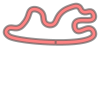

In [38]:
# Replace the name here with the track to analyze
# ここで名前を解析するトラックで置き換える
TRACK_NAME = 'FS_June2020'

# Load the center, inner, outer waypoints
# 中心、内側、外側のウェイポイントをロードする
waypoints = np.load("./tracks/%s.npy" % TRACK_NAME)

# Convert to Shapely objects
# Shapelyオブジェクトに変換する
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]
l_center_line = LineString(center_line)
l_inner_border = LineString(inner_border)
l_outer_border = LineString(outer_border)

# DBG START
#print(np.ndim(l_inner_border))  ## 0
#print(l_inner_border)

#fliqud = np.flipud(inner_border)
#print(fliqud)

#vstack=np.vstack((outer_border, np.flipud(inner_border)))
#print(vstack)
# DBG END

# 配列として認識されないため、元データに置き換える⇒いけたっぽい
#road_poly = Polygon(np.vstack((l_outer_border, np.flipud(l_inner_border))))
road_poly = Polygon(np.vstack((outer_border, np.flipud(inner_border))))
print("Is loop/ring? ", l_center_line.is_ring)
road_poly

Is loop/ring?  True


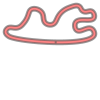

In [40]:
# Own code: Reduce width of track
# 幅を縮める（縁石を踏まないようにするため）

def dist_2_points(x1, x2, y1, y2):
        return abs(abs(x1-x2)**2 + abs(y1-y2)**2)**0.5
    
def x_perc_width(waypoint, perc_width):
    
    center_x, center_y, inner_x, inner_y, outer_x, outer_y = waypoint
    
    width = dist_2_points(inner_x, outer_x, inner_y, outer_y)
    
    delta_x = outer_x-inner_x
    delta_y = outer_y-inner_y
    
    inner_x_new = inner_x + delta_x/2 * (1-perc_width)
    outer_x_new = outer_x - delta_x/2 * (1-perc_width)
    inner_y_new = inner_y + delta_y/2 * (1-perc_width)
    outer_y_new = outer_y - delta_y/2 * (1-perc_width)
    
    return [center_x, center_y, inner_x_new, inner_y_new, outer_x_new, outer_y_new]

PERC_WIDTH = 0.8
waypoints_new = [x_perc_width(waypoint, perc_width=PERC_WIDTH) for waypoint in waypoints]
waypoints_new = np.asarray(waypoints_new)

# Convert to Shapely objects
# Shapelyオブジェクトに変換する
inner_border_new = waypoints_new[:,2:4]
outer_border_new = waypoints_new[:,4:6]
l_inner_border_new = LineString(inner_border_new)
l_outer_border_new = LineString(outer_border_new)

# LineStringが配列扱いされないため、一旦元データを入力する
#road_poly_new = Polygon(np.vstack((l_outer_border_new, np.flipud(l_inner_border_new))))
road_poly_new = Polygon(np.vstack((outer_border_new, np.flipud(inner_border_new))))
print("Is loop/ring? ", l_center_line.is_ring)
road_poly_new

# Display the original track waypoints

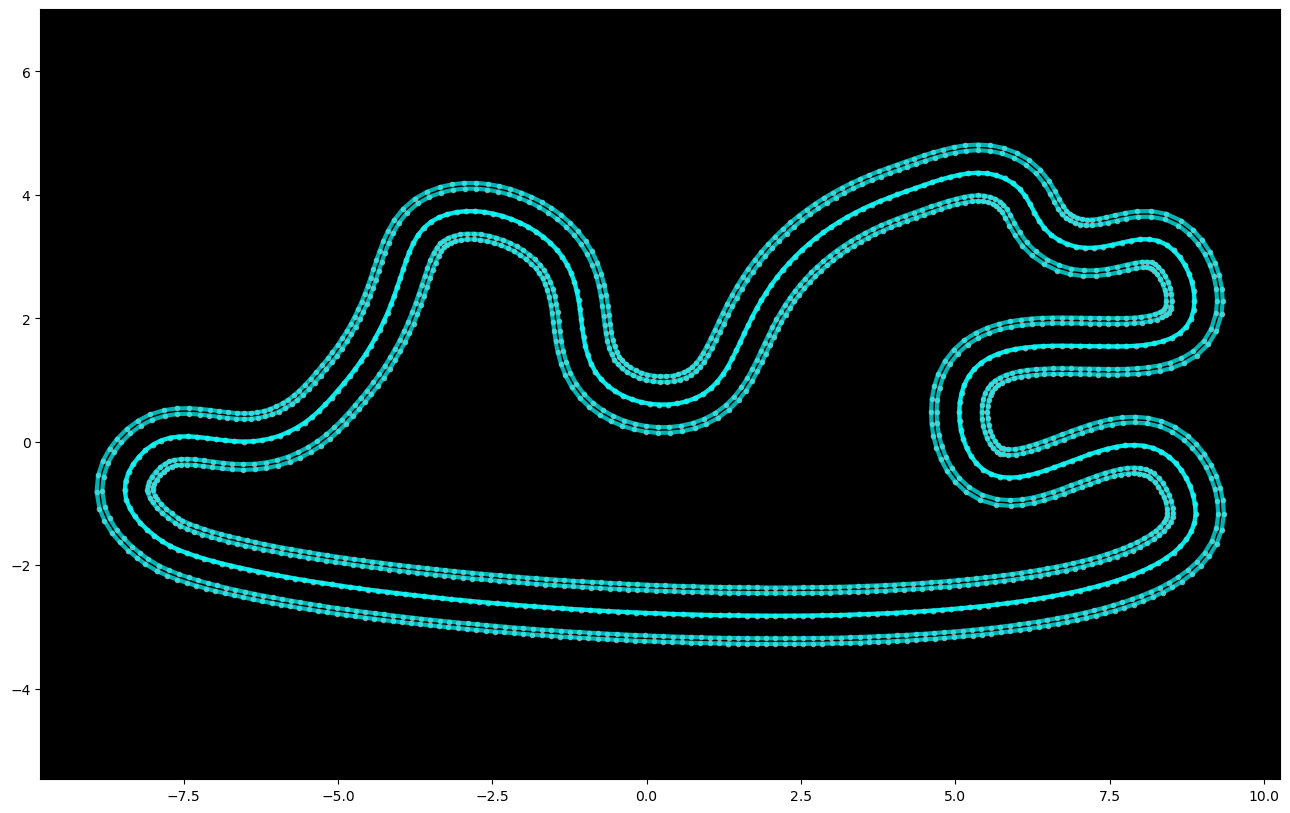

In [41]:
## ポイント描画する
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color='cyan', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

# Also print new border
print_border(ax, center_line, inner_border_new, outer_border_new)


In [42]:
# From https://github.com/e-koch/ewky_scripts/blob/master/curvature.py

# The MIT License (MIT)
#
# Copyright (c) 2014 Eric Koch
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

def menger_curvature(pt1, pt2, pt3, atol=1e-3):

    vec21 = np.array([pt1[0]-pt2[0], pt1[1]-pt2[1]])
    vec23 = np.array([pt3[0]-pt2[0], pt3[1]-pt2[1]])

    norm21 = np.linalg.norm(vec21)
    norm23 = np.linalg.norm(vec23)

    theta = np.arccos(np.dot(vec21, vec23)/(norm21*norm23))
    if np.isclose(theta-np.pi, 0.0, atol=atol):
        theta = 0.0

    dist13 = np.linalg.norm(vec21-vec23)

    return 2*np.sin(theta) / dist13

In [43]:
import copy
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString

# Number of times to iterate each new race line point
# keep this at 3-8 for best balance of performance and desired result
XI_ITERATIONS=8 # default 4

# Number of times to scan the entire race track to iterate
# 500 will get a good start, 1500 will be closer to optimal result
LINE_ITERATIONS=10 # default 1000

def improve_race_line(old_line, inner_border, outer_border):
    '''Use gradient descent, inspired by K1999, to find the racing line'''
    # start with the center line
    new_line = copy.deepcopy(old_line)
    ls_inner_border = Polygon(inner_border)
    ls_outer_border = Polygon(outer_border)
    for i in range(0,len(new_line)):
        xi = new_line[i]
        npoints = len(new_line)
        prevprev = (i - 2 + npoints) % npoints
        prev = (i - 1 + npoints) % npoints
        nexxt = (i + 1 + npoints) % npoints
        nexxtnexxt = (i + 2 + npoints) % npoints
        #print("%d: %d %d %d %d %d" % (npoints, prevprev, prev, i, nexxt, nexxtnexxt))
        ci = menger_curvature(new_line[prev], xi, new_line[nexxt])
        c1 = menger_curvature(new_line[prevprev], new_line[prev], xi)
        c2 = menger_curvature(xi, new_line[nexxt], new_line[nexxtnexxt])
        target_ci = (c1 + c2) / 2
        #print("i %d ci %f target_ci %f c1 %f c2 %f" % (i, ci, target_ci, c1, c2))

        # Calculate prospective new track position, start at half-way (curvature zero)
        xi_bound1 = copy.deepcopy(xi)
        xi_bound2 = ((new_line[nexxt][0] + new_line[prev][0]) / 2.0, (new_line[nexxt][1] + new_line[prev][1]) / 2.0)
        p_xi = copy.deepcopy(xi)
        for j in range(0,XI_ITERATIONS):
            p_ci = menger_curvature(new_line[prev], p_xi, new_line[nexxt])
            #print("i: {} iter {} p_ci {} p_xi {} b1 {} b2 {}".format(i,j,p_ci,p_xi,xi_bound1, xi_bound2))
            if np.isclose(p_ci, target_ci):
                break
            if p_ci < target_ci:
                # too flat, shrinking track too much
                xi_bound2 = copy.deepcopy(p_xi)
                new_p_xi = ((xi_bound1[0] + p_xi[0]) / 2.0, (xi_bound1[1] + p_xi[1]) / 2.0)
                if Point(new_p_xi).within(ls_inner_border) or not Point(new_p_xi).within(ls_outer_border):
                    xi_bound1 = copy.deepcopy(new_p_xi)
                else:
                    p_xi = new_p_xi
            else:
                # too curved, flatten it out
                xi_bound1 = copy.deepcopy(p_xi)
                new_p_xi = ((xi_bound2[0] + p_xi[0]) / 2.0, (xi_bound2[1] + p_xi[1]) / 2.0)

                # If iteration pushes the point beyond the border of the track,
                # just abandon the refinement at this point.  As adjacent
                # points are adjusted within the track the point should gradually
                # make its way to a new position.  A better way would be to use
                # a projection of the point on the border as the new bound.  Later.
                if Point(new_p_xi).within(ls_inner_border) or not Point(new_p_xi).within(ls_outer_border):
                    xi_bound2 = copy.deepcopy(new_p_xi)
                else:
                    p_xi = new_p_xi
        new_xi = p_xi
        # New point which has mid-curvature of prev and next points but may be outside of track
        #print((new_line[i], new_xi))
        new_line[i] = new_xi
    return new_line

## Calculate the race line!

In [53]:
print(len(center_line))
# start along centerline of track
race_line = copy.deepcopy(center_line[:-1])  # Use this for centerline being outer bound
for i in range(LINE_ITERATIONS):
    race_line = improve_race_line(race_line, inner_border_new, outer_border_new)  # Remove "_new" for entire track width

    if i % 20 == 0: print("Iteration %d" % i, end="\r", flush=True)

354


C:\Users\masak\AppData\Local\Temp\ipykernel_25168\3857907162.py:33: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos(np.dot(vec21, vec23)/(norm21*norm23))
C:\Users\masak\AppData\Local\Temp\ipykernel_25168\3857907162.py:33: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.dot(vec21, vec23)/(norm21*norm23))


[[ 1.33937587e+00 -2.44740889e+00]
 [ 1.19017850e+00 -2.44475002e+00]
 [ 1.04098694e+00 -2.44166355e+00]
 [ 8.91799021e-01 -2.43815055e+00]
 [ 7.42619425e-01 -2.43421366e+00]
 [ 5.93449068e-01 -2.42985420e+00]
 [ 4.44291297e-01 -2.42507086e+00]
 [ 2.95139936e-01 -2.41986673e+00]
 [ 1.46002726e-01 -2.41424329e+00]
 [-3.12250786e-03 -2.40820186e+00]
 [-1.52232106e-01 -2.40174370e+00]
 [-3.01326549e-01 -2.39486899e+00]
 [-4.50404117e-01 -2.38758066e+00]
 [-5.99463707e-01 -2.37987952e+00]
 [-7.48506600e-01 -2.37176492e+00]
 [-8.97529614e-01 -2.36324255e+00]
 [-1.04652753e+00 -2.35430951e+00]
 [-1.19549952e+00 -2.34496772e+00]
 [-1.34449347e+00 -2.33522205e+00]
 [-1.49346632e+00 -2.32508688e+00]
 [-1.64243060e+00 -2.31456647e+00]
 [-1.79135487e+00 -2.30366504e+00]
 [-1.94021887e+00 -2.29237180e+00]
 [-2.08903835e+00 -2.28068027e+00]
 [-2.23780880e+00 -2.26858089e+00]
 [-2.38652434e+00 -2.25607030e+00]
 [-2.53519180e+00 -2.24313867e+00]
 [-2.68379469e+00 -2.22978170e+00]
 [-2.83235147e+00 -2

These should be the same:  ((354, 2), (354, 2))
Original centerline length: 52.87
New race line length: 52.67


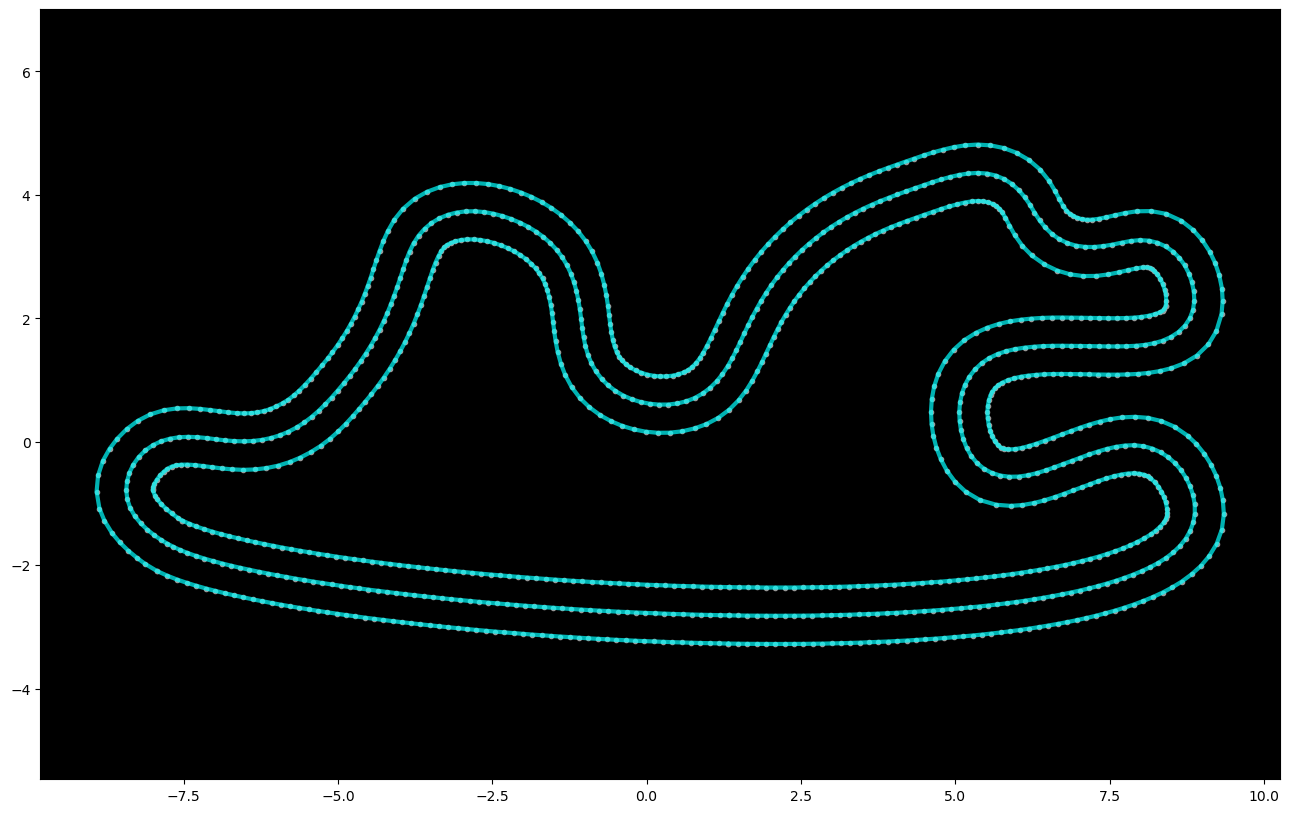

In [45]:
# need to put duplicate point race_line[0] at race_line[-1] to make a closed loops
loop_race_line = np.append(race_line, [race_line[0]], axis=0)

# These should be the same
print("These should be the same: ", (center_line.shape, loop_race_line.shape))
print("Original centerline length: %0.2f" % l_center_line.length)
print("New race line length: %0.2f" % LineString(loop_race_line).length)

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, loop_race_line, inner_border, outer_border)

# Also print new border
#print_border(ax, loop_race_line, inner_border_new, outer_border_new)

## Save the raceline as:

1. Binary numpy array for loading from a file
2. Text numpy array for pasting directly into a reward function

In [50]:
from datetime import datetime

now = datetime.now()
filename = '%s-%d-%d-%s' % (TRACK_NAME, LINE_ITERATIONS, XI_ITERATIONS, now.strftime('%Y-%m-%d-%H%M%S'))
prefix = './racelines/%s' % filename
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(loop_race_line))
    
print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, loop_race_line)

Writing python code to ./racelines/FS_June2020-10-8-2023-02-19-191045.py
Writing numpy binary to ./racelines/FS_June2020-10-8-2023-02-19-191045.npy


# Load and visualize a stored track file

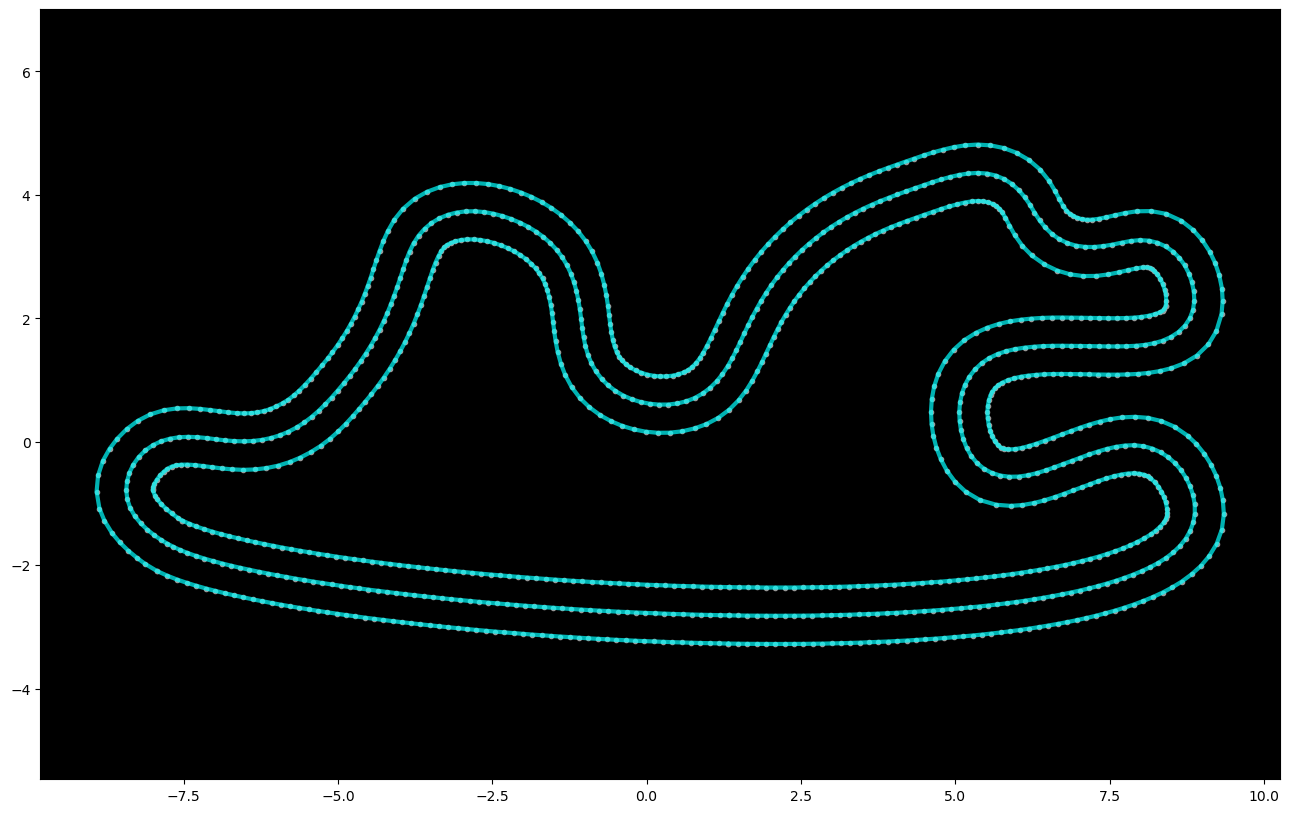

In [52]:
from numpy import array

fname = './racelines/%s.py' % filename
with open(fname, "r") as file:
    deserialized = eval(file.read())
deserialized
fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, deserialized, inner_border, outer_border)